<a href="https://colab.research.google.com/github/umassdgithub/Fall2021-Week-11/blob/main/Fall2021_GeoPandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Geospatial data manipulation
## Geopandas

"Geopandas is an open source project to make working with geospatial data in python easier. GeoPandas extends the datatypes used by pandas to allow spatial operations on geometric types. Geometric operations are performed by shapely. Geopandas further depends on fiona for file access and descartes and matplotlib for plotting."https://geopandas.org/


In [ ]:
pip install geopandas

You should consider upgrading via the '/Users/mbp/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install descartes

You should consider upgrading via the '/Users/mbp/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import geopandas as gpd
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt
from descartes import PolygonPatch

## Load shape file for the us counties from US CENSUS data website:

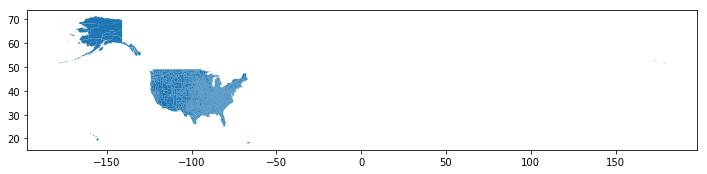

In [ ]:
df_counties = gpd.read_file("https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_county_20m.zip")
df_counties.plot(figsize=(12,10))

## EPSG (1024-32767)
https://support.esri.com/en/technical-article/000002814#:~:text=Answer,version%20of%20the%20EPSG%20model.
https://epsg.org/home.html
https://source.opennews.org/articles/choosing-right-map-projection/

The EPSG Geodetic Parameter Dataset is a collection of definitions of coordinate reference systems and coordinate transformations which may be global, regional, national or local in application.

<img src="https://media.opennews.org/cache/50/80/5080eb1ee8d12ad38837cb1696d64441.jpg" width="90%">

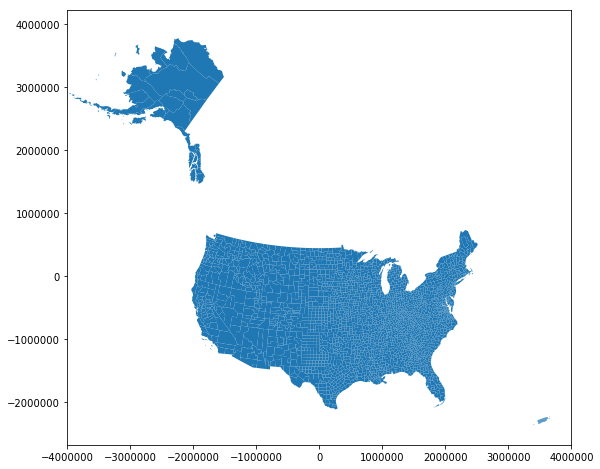

In [ ]:
f,ax = plt.subplots(1,1,figsize=(12,8))
ax.set_xlim([-.4e7,.4e7]) ## Set the limits


## Use EPSG: 
df_counties.to_crs(epsg=2163).plot(ax=ax)

## Overview Data

In [ ]:
print(df_counties)

     STATEFP COUNTYFP  COUNTYNS        AFFGEOID  GEOID      NAME LSAD  \
0         37      017  01026336  0500000US37017  37017    Bladen   06   
1         37      167  01025844  0500000US37167  37167    Stanly   06   
2         39      153  01074088  0500000US39153  39153    Summit   06   
3         42      113  01213687  0500000US42113  42113  Sullivan   06   
4         48      459  01384015  0500000US48459  48459    Upshur   06   
...      ...      ...       ...             ...    ...       ...  ...   
3215      38      005  01034216  0500000US38005  38005    Benson   06   
3216      72      079  01804520  0500000US72079  72079     Lajas   13   
3217      31      159  00835901  0500000US31159  31159    Seward   06   
3218      37      023  01008539  0500000US37023  37023     Burke   06   
3219      13      261  00343504  0500000US13261  13261    Sumter   06   

           ALAND     AWATER                                           geometry  
0     2265887723   33010866  POLYGON ((-78

In [ ]:
## loading us election data from NYT

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/ChasManRors/USElection2020-NYT-Results/master/data/2020-11-07%2014-15-14/results_president.csv")

## Overview ellection data

In [ ]:
data.head(1)

,fips,name,votes,absentee_votes,reporting,precincts,absentee_method,eevp,tot_exp_vote,eevp_value,...,results_mchughj,results_jacob_fambrop,results_scottj,results_kishorej,results_absentee_charlesm,results_absentee_mchughj,results_absentee_jacob_fambrop,results_absentee_scottj,results_absentee_kishorej,winner
FIPS,,,,,,,,,,,,,,,,,,,,,
02901,2901,ED 1,4251,955,5,9,Released as a separate subtotal as first repor...,56.0,7634.0,56%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Trump


In [ ]:
cols = ""
for col in data.columns:
    cols = cols+ col + ", "
print(cols)

fips, name, votes, absentee_votes, reporting, precincts, absentee_method, eevp, tot_exp_vote, eevp_value, eevp_display, eevp_source, turnout_stage, absentee_count_progress, absentee_outstanding, absentee_max_ballots, provisional_outstanding, provisional_count_progress, results_trumpd, results_bidenj, results_jorgensenj, results_venturaj, results_pierceb, results_blankenshipd, results_de_la_fuenter, results_write-ins, results_absentee_trumpd, results_absentee_bidenj, results_absentee_jorgensenj, results_absentee_venturaj, results_absentee_pierceb, results_absentee_blankenshipd, results_absentee_de_la_fuenter, results_absentee_write-ins, last_updated, leader_margin_value, leader_margin_display, leader_margin_name_display, leader_party_id, margin2020, state, retrieved_time, results_hawkinsh, results_absentee_hawkinsh, votes2016, margin2016, votes2012, margin2012, results_westk, results_kennedya, results_la_rivag, results_absentee_westk, results_absentee_kennedya, results_absentee_la_rivag

## Make sure the FIPS field has 5 digits size FIPS values

In [ ]:
def FiveDigit(x):
    if len(x)<4:
        return '00'+ str(x)
    elif len(x)<5:
        return '0'+ str(x)
    else:
        return x
data['FIPS'] = data['fips'].astype("str")
data['FIPS'] = data['FIPS'].apply(FiveDigit)
data.set_index('FIPS',inplace=True)

## Define winnder using 1 line if statement 

In [ ]:
data['winner'] = (data['results_trumpd']-data['results_bidenj']).apply(lambda x: 'Biden' if x<0 else 'Trump')

## Join data with counties using GEOID and FIPS

In [ ]:
df_counties_data = df_counties.join(data[['state','votes','results_trumpd','results_bidenj','winner']],on='GEOID',rsuffix='_').sort_values("GEOID")
df_counties_data = df_counties_data.dropna()

## Visualize the data using the color map of blue white red

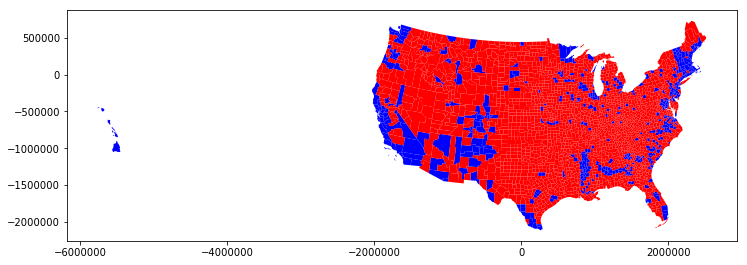

In [ ]:
## https://source.opennews.org/articles/choosing-right-map-projection/ 
f,ax = plt.subplots(1,1,figsize=(12,7))
# ax.set_xlim([-.4e7,.4e7]) ## Set the limits
df_counties_data.to_crs(epsg=2163).plot(ax=ax,column='winner',cmap='bwr')


## Export the result into geojson file

In [ ]:
df_counties_data.to_file("counties.json", driver="GeoJSON")